# QGIS Maps With Basemaps

In [1]:
from IPython.display import Image

from PyQt5.QtGui import QColor
from PyQt5.QtWidgets import QApplication

from qgis.core import QgsApplication, QgsVectorLayer, QgsProject, QgsRasterLayer, \
    QgsCoordinateReferenceSystem, QgsProviderRegistry, QgsSimpleMarkerSymbolLayerBase
from qgis.gui import QgsMapCanvas

## Setting up the Project and Canvas

In [2]:
app = QApplication([])
qgs = QgsApplication([], False)
qgs.setPrefixPath(r"C:\temp", True)  # setting a prefix path should enable the WMS provider
qgs.initQgis()
canvas = QgsMapCanvas()
project = QgsProject.instance()
map_crs = QgsCoordinateReferenceSystem('EPSG:3857')
canvas.setDestinationCrs(map_crs)

Make sure that the WMS provider is available

In [3]:
print("providers: ", QgsProviderRegistry.instance().providerList())

providers:  ['OAPIF', 'WFS', 'arcgisfeatureserver', 'arcgismapserver', 'copc', 'delimitedtext', 'ept', 'gdal', 'geonode', 'gpx', 'mdal', 'memory', 'mesh_memory', 'mssql', 'ogr', 'pdal', 'postgres', 'postgresraster', 'spatialite', 'vectortile', 'virtual', 'virtualraster', 'wcs', 'wms']


Our convenience functions for creating the map images

In [4]:
def saveImage(path, show=True): 
    canvas.saveAsImage(path)
    if show: return Image(path)

def plot_layers(layers):
    canvas.setLayers(layers)
    for l in layers:
        l.triggerRepaint()
    canvas.show()
    app.exec()
    return saveImage("my-traj.png", show=True)

## Loading a Vector Layer

In [5]:
vlayer = QgsVectorLayer("./data/geolife_small.gpkg", "Geolife small sample")
print(vlayer.crs())
if vlayer.isValid():
    project.addMapLayer(vlayer)
else:
    print("Layer failed to load!")

<QgsCoordinateReferenceSystem: EPSG:4326>


## Loading OSM Tiles

In [6]:
urlWithParams = 'type=xyz&url=https://tile.openstreetmap.org/{z}/{x}/{y}.png&zmax=19&zmin=0&crs=EPSG3857'
rlayer = QgsRasterLayer(urlWithParams, 'OpenStreetMap', 'wms')  
print(rlayer.crs())
if rlayer.isValid():
    project.addMapLayer(rlayer)
else:
    print('invalid layer')
    print(rlayer.error().summary()) 

<QgsCoordinateReferenceSystem: EPSG:3857>


## Plotting the Map

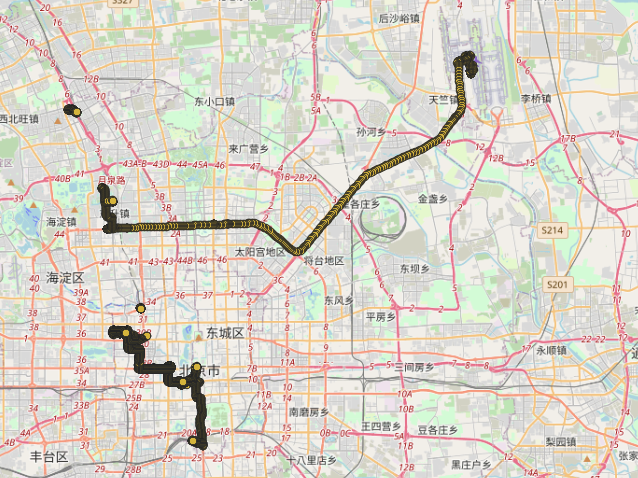

In [7]:
canvas.setExtent(rlayer.extent())
plot_layers([vlayer,rlayer])

## Customizing the Vector Layer Symbology

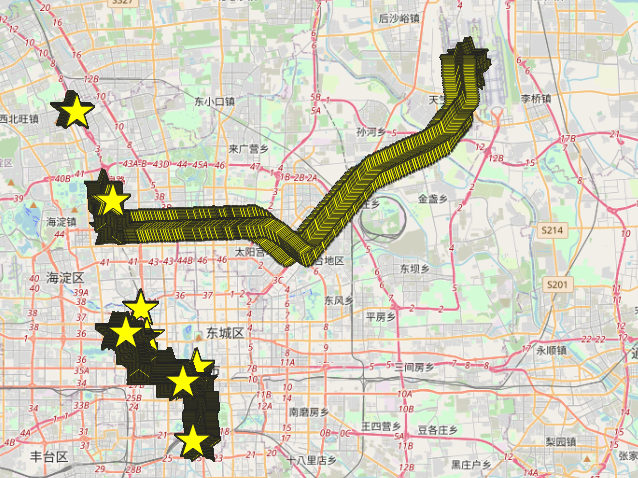

In [8]:
vlayer.renderer().symbol().setColor(QColor("yellow"))
vlayer.renderer().symbol().symbolLayer(0).setShape(QgsSimpleMarkerSymbolLayerBase.Star)
vlayer.renderer().symbol().symbolLayer(0).setSize(10)
plot_layers([vlayer,rlayer])

## Other Basemaps

<QgsCoordinateReferenceSystem: EPSG:3857>


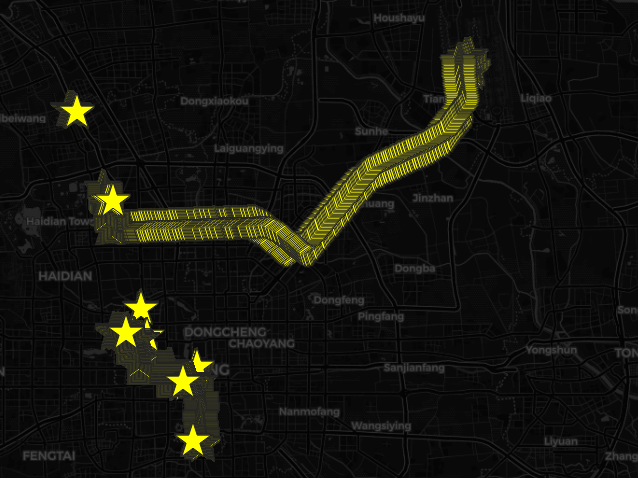

In [11]:
urlWithParams = 'type=xyz&url=http://basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png&zmax=19&zmin=0&crs=EPSG3857'
rlayer2 = QgsRasterLayer(urlWithParams, 'Carto', 'wms')  
print(rlayer2.crs())
if rlayer2.isValid():
    project.addMapLayer(rlayer2)
else:
    print('invalid layer')
    print(rlayer2.error().summary()) 
    
plot_layers([vlayer,rlayer2])